In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
import time
import tqdm
from tqdm import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

In [4]:
# Step 1: Load Training and Testing Data
data_train = pd.read_csv('data-training-02.csv')
data_test = pd.read_csv('data-testing-02.csv')

In [6]:
# Display training and testing data to understand their structure
print(data_train.head())

   weekday_sin  weekday_cos     month_sin  month_cos   day_sin   day_cos  \
0    -0.781831     0.623490 -2.449294e-16   1.000000  0.998717 -0.050649   
1    -0.974928    -0.222521 -5.000000e-01  -0.866025  0.937752  0.347305   
2    -0.433884    -0.900969  5.000000e-01  -0.866025 -0.299363 -0.954139   
3    -0.781831     0.623490  8.660254e-01  -0.500000 -0.897805 -0.440394   
4    -0.433884    -0.900969  8.660254e-01   0.500000 -0.968077 -0.250653   

   hour_sin  hour_cos  category_entertainment  category_food_dining  ...  \
0 -0.707107 -0.707107                   False                  True  ...   
1  0.707107 -0.707107                   False                 False  ...   
2  0.965926  0.258819                   False                 False  ...   
3 -0.500000 -0.866025                   False                 False  ...   
4 -0.866025  0.500000                   False                 False  ...   

   category_shopping_net  category_shopping_pos  category_travel  gender_F  \
0       

In [7]:
# Splitting features and target
X_train = data_train.drop(columns=['is_fraud'])
y_train = data_train['is_fraud']
X_test = data_test.drop(columns=['is_fraud'])
y_test = data_test['is_fraud']

In [11]:
print("Training data shape is:", data_train.shape)
print("Testing data shape is:", data_test.shape)

Training data shape is: (768890, 29)
Testing data shape is: (164170, 29)


In [13]:
# Step 2: Linear SVM Model
svm_linear_model = LinearSVC(dual=False, random_state=123, class_weight='balanced')

In [15]:
%time svm_linear_model.fit(X_train, y_train)

CPU times: user 4.18 s, sys: 204 ms, total: 4.39 s
Wall time: 4.38 s


LinearSVC(class_weight='balanced', dual=False, random_state=123)

In [16]:
y_pred_class_linear = svm_linear_model.predict(X_test)
y_pred_class_linear

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# Step 3: Linear SVM Model Evaluation
print(metrics.classification_report(y_test, y_pred_class_linear))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    163240
           1       0.07      0.76      0.13       930

    accuracy                           0.94    164170
   macro avg       0.53      0.85      0.55    164170
weighted avg       0.99      0.94      0.96    164170



In [20]:
from sklearn.metrics import fbeta_score
f_beta_linear = fbeta_score(y_test, y_pred_class_linear, beta=2) # Recall-focused
f_beta_linear

0.2533228526511362

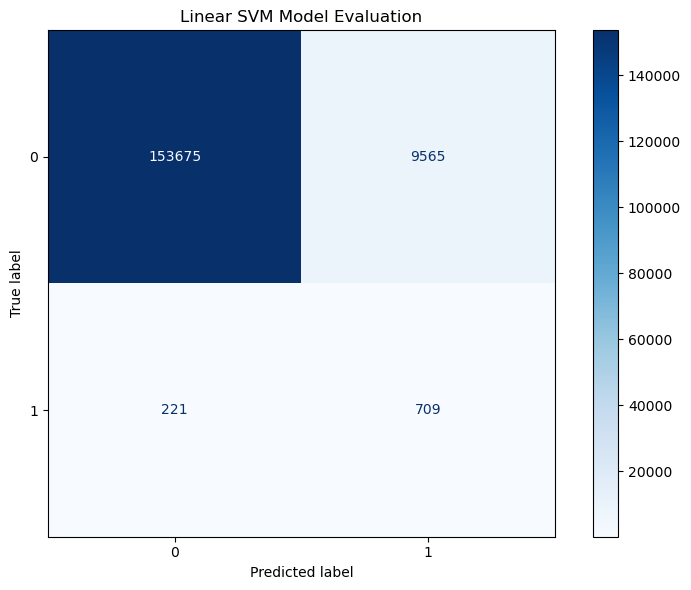

In [23]:
# Plot Confusion Matrix for Non-linear SVM with RBF Kernel
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(svm_linear_model, X_test, y_test, ax=ax, cmap='Blues')
ax.title.set_text('Linear SVM Model Evaluation')
plt.tight_layout()
plt.savefig('linear SVM')
plt.show()

In [27]:
# Step 4: Non-linear SVM with RBF Kernel
svm_rbf_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=123, class_weight='balanced')

In [29]:
%time svm_rbf_model.fit(X_train, y_train)

CPU times: user 1h 2min 38s, sys: 1min 33s, total: 1h 4min 11s
Wall time: 1h 4min 20s


SVC(C=1, class_weight='balanced', random_state=123)

In [30]:
y_pred_class_rbf = svm_rbf_model.predict(X_test)
y_pred_class_rbf

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
print(metrics.classification_report(y_test, y_pred_class_rbf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    163240
           1       0.15      0.60      0.24       930

    accuracy                           0.98    164170
   macro avg       0.57      0.79      0.62    164170
weighted avg       0.99      0.98      0.99    164170



In [32]:
metrics.accuracy_score(y_test, y_pred_class_rbf)

0.9788572820856429

In [33]:
from sklearn.metrics import fbeta_score
f_beta = fbeta_score(y_test, y_pred_class_rbf, beta=2) # Recall-focused
f_beta

0.37705140377051405

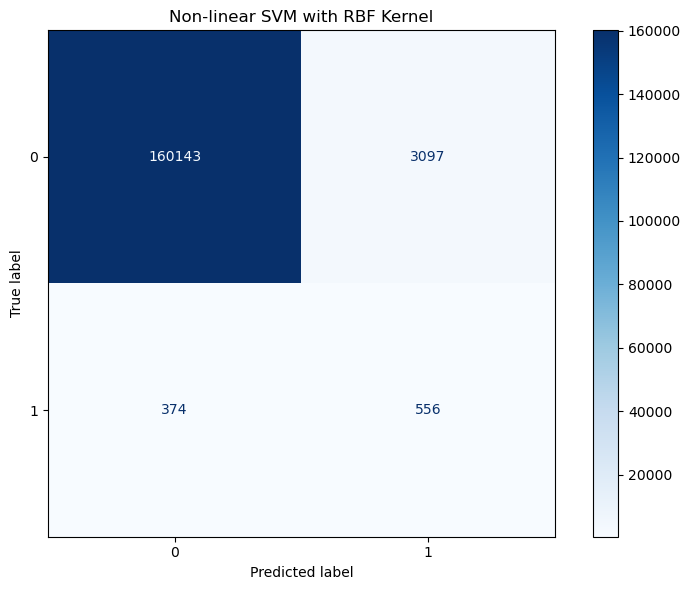

In [34]:
# Plot Confusion Matrix for Non-linear SVM with RBF Kernel
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(svm_rbf_model, X_test, y_test, ax=ax, cmap='Blues')
ax.title.set_text('Non-linear SVM with RBF Kernel')
plt.tight_layout()
plt.savefig('RBF_SVM')
plt.show()